# Using R package yorkr - A quick overview
In this notebook I use my R package **yorkr** to perform analysis of 

1. ODI match between Australia - India in 12 feb 2012
2. Analysis of Virat Kohli's batting 

The data for these 2 analyses are available on Github. To know more about my R package 'yorkr' do take a look at my blog [Giga thoughts](https://gigadom.wordpress.com/). My package yorkr uses data from [Cricsheet](http://cricsheet.org/) and can handle ODI, T20 and IPL matches. The data in Cricsheet are in yaml format. I have already converted the data of the individual matches to .RData and have uploaded it to Github. You can download or use this data from Github which is available at [yorkrData](https://github.com/tvganesh/yorkrData). The details on how to use this data are also available in my blog posts.


In [1]:
install.packages("yorkr")
library(yorkr)
library(rpart)
library(dplyr)

Installing package into '/gpfs/global_fs01/sym_shared/YPProdSpark/user/sc50-a979762c5b05ec-d2b8f26cd8fd/R/libs'
(as 'lib' is unspecified)

Attaching package: 'dplyr'

The following objects are masked from 'package:SparkR':

    arrange, between, collect, contains, count, cume_dist, dense_rank,
    desc, distinct, explain, filter, first, group_by, intersect, lag,
    last, lead, mutate, n, n_distinct, ntile, percent_rank, rename,
    row_number, sample_frac, select, sql, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



**Disclaimer:** *This article represents the author’s viewpoint only and doesn’t necessarily represent IBM’s positions, strategies or opinions*

## Load the match data for the Australia-India ODI match in 2012 at Sydney from Github

The data for all matches are available at Github at [yorkrData](https://github.com/tvganesh/yorkrData)
**Note:Here I use the data one particular match. You can use this notebook with data from other matches. yorkrData has data for ODI, T20 and IPL matches**


In [2]:

load(url("https://github.com/tvganesh/yorkrData/raw/master/ODI/ODI-matches/Australia-India-2012-02-12.RData"))
aus_ind <- overs

In [3]:
# Display the batting scorecard of Australia
teamBattingScorecardMatch(aus_ind,'Australia')

Total= 260 


,batsman,ballsPlayed,fours,sixes,runs
1,DA Warner,23,2,0,18
2,RT Ponting,13,1,0,6
3,MJ Clarke,43,5,0,38
4,PJ Forrest,83,5,2,66
5,DJ Hussey,76,5,0,72
6,DT Christian,36,2,0,39
7,MS Wade,17,1,0,16
8,RJ Harris,2,0,0,2
9,CJ McKay,3,0,0,3


In [4]:
# Display the batting scorecard of India
teamBattingScorecardMatch(aus_ind,'India')

Total= 258 


,batsman,ballsPlayed,fours,sixes,runs
1,G Gambhir,110,7,0,92
2,V Sehwag,20,3,0,20
3,V Kohli,28,1,0,18
4,RG Sharma,41,1,1,33
5,SK Raina,30,3,1,38
6,MS Dhoni,57,0,1,44
7,RA Jadeja,8,0,0,12
8,R Ashwin,2,0,0,1


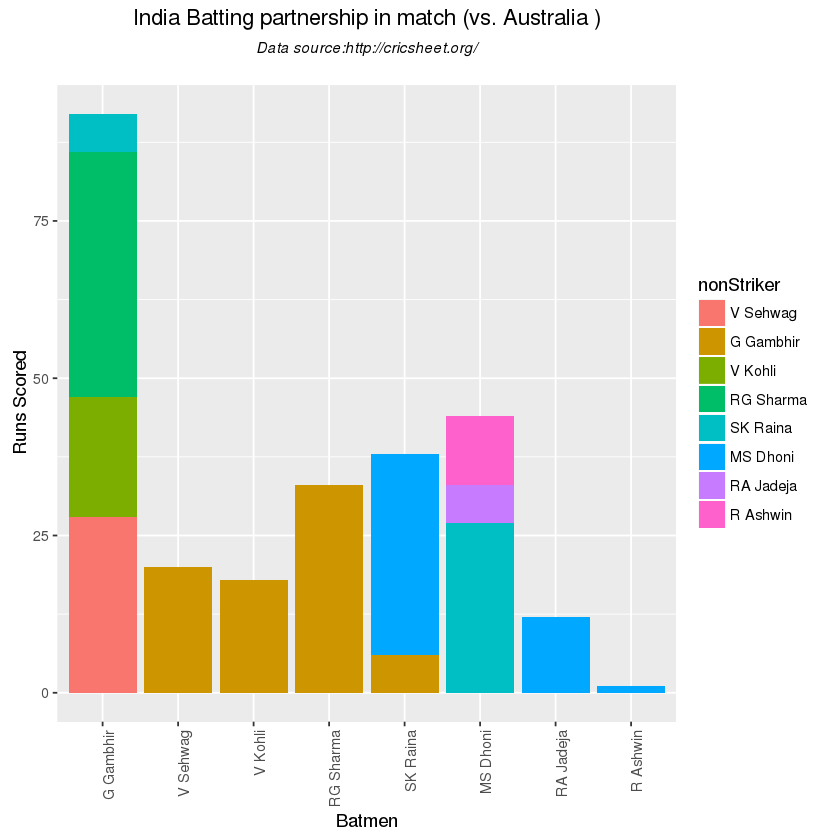

In [5]:
# Plot the batting partenerships of India
teamBatsmenPartnershipMatch(aus_ind,"India","Australia")

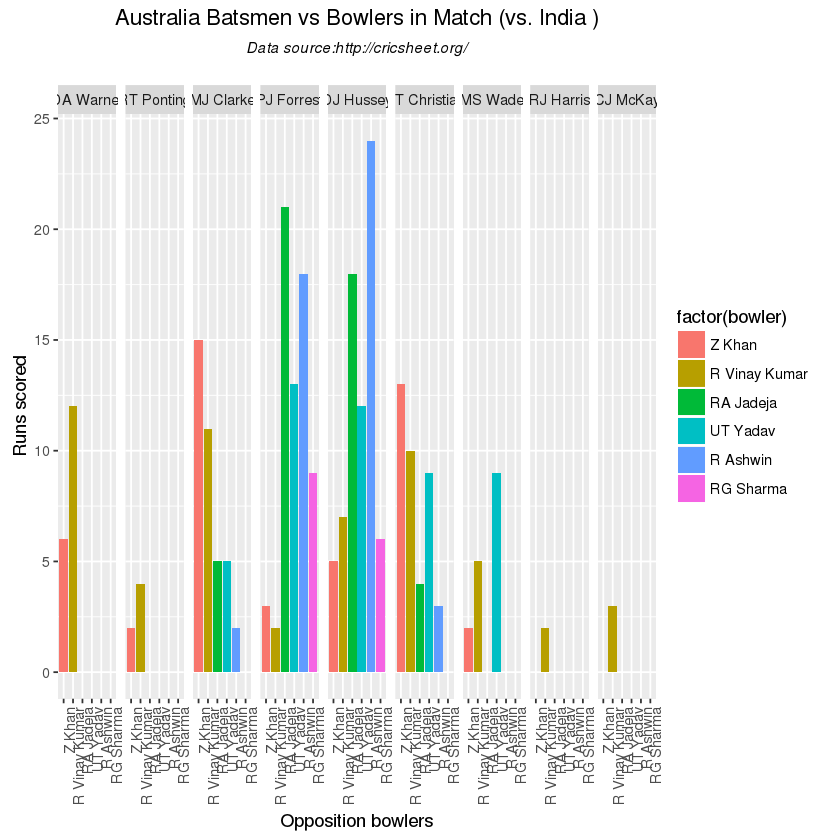

In [6]:
# Plot the performance of Australian batsmen against Indian bowlers
teamBatsmenVsBowlersMatch(aus_ind,'Australia',"India", plot=TRUE)

In [7]:
# Display the bowling scorecard of India
teamBowlingScorecardMatch(aus_ind,'India')

,bowler,overs,maidens,runs,wickets
1,Z Khan,10,0,46,1
2,R Vinay Kumar,10,1,58,5
3,RA Jadeja,10,0,50,0
4,UT Yadav,10,1,49,2
5,R Ashwin,8,0,47,0
6,RG Sharma,2,0,15,0


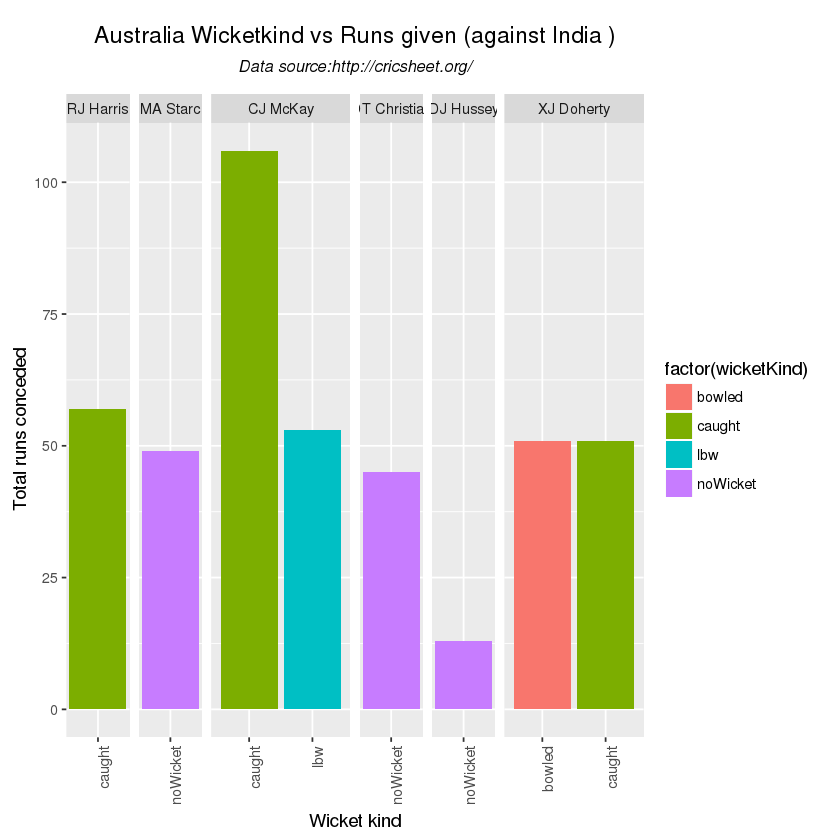

In [8]:
# Display the Wicket kind vs Runs conceded of Australia
teamBowlingWicketKindMatch(aus_ind,"Australia","India")

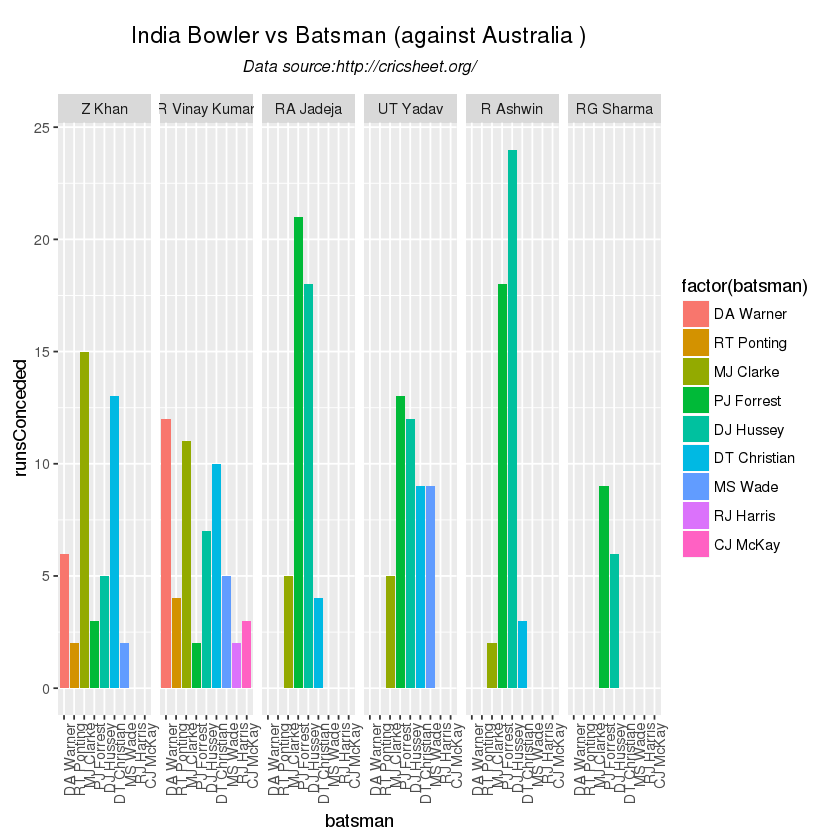

In [9]:
# Plot the runs conceded of India bowlers vs Australia
teamBowlersVsBatsmenMatch(aus_ind,"India","Australia")

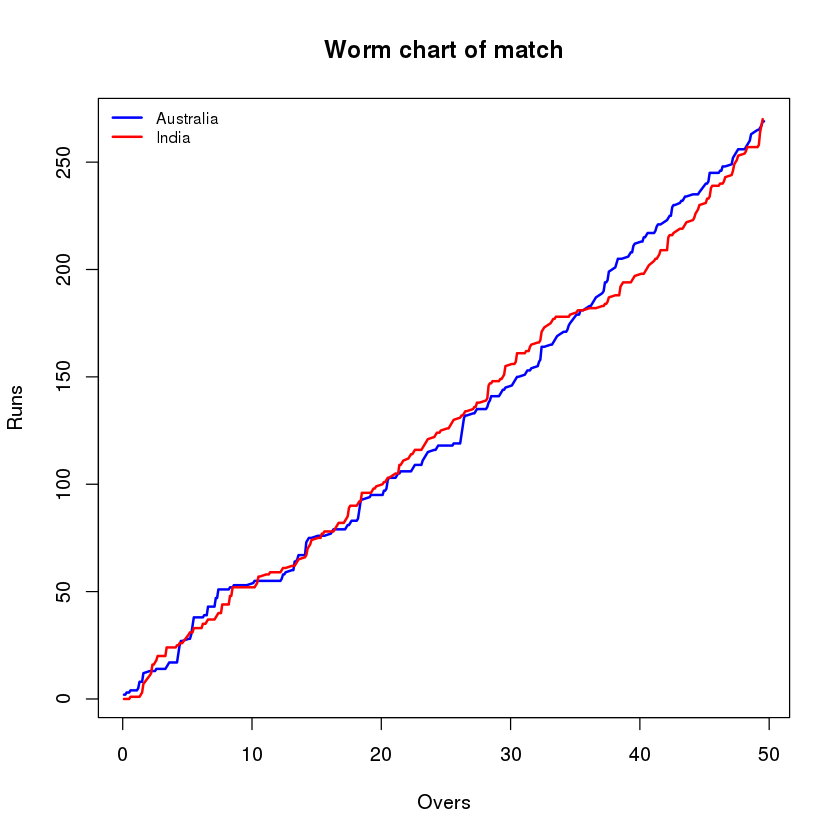

In [10]:
# Plot the worm chart of the match
matchWormGraph(aus_ind,'Australia',"India")

## Using yorkr with IPL data. Analysis of batting performance of Virat Kohli
In this part of the notebook I analyze performance of Virat Kohli of Royal Challengers Bangalore(RCB). For this I use the data of all matches of RCB. As I mentioned above the data of all the IPL teams are available at [yorkrData](https://github.com/tvganesh/yorkrData). You can this data for other players of RCB. In yorkrdata data is available for other IPL teams like CSK, MI, DD etc. You can import this notebook and just change the URL and a few other minor changes to analyze the performance of the player of that team. For e.g. M S Dhoni of Chennai Super Kings, or Rohit Sharma of Mumbai Indians etc. 

**Note:**: This posts uses data for IPL matches. However yorkrData also has data for  ODI and T20 matches. You can do similar analysis of other batsmen or bowlers in ODI ot T20 matches. For details on how to use the R package 'yorkr' please see my blog [Giga thoughts](https://gigadom.wordpress.com/) and check out the posts on yorkr for IDI, T20 and IPL matches. All posts can be seen at [Index of Posts](https://gigadom.wordpress.com/aa-2/)

In [11]:
# Load the RCB Batting details data from yorkrData
load(url("https://github.com/tvganesh/yorkrData/raw/master/battingBowlingDetails/Royal%20Challengers%20Bangalore-BattingDetails.RData"))
save(battingDetails,file="Royal Challengers Bangalore-BattingDetails.RData")
# Get the current directory
d= getwd()
# Call getBastmanDetails() and set the path where the .RData file is available
kohli <-  getBatsmanDetails(team="Royal Challengers Bangalore",name="V Kohli",dir=d)
dim(kohli)

[1] "/gpfs/global_fs01/sym_shared/YPProdSpark/user/sc50-a979762c5b05ec-d2b8f26cd8fd/notebook/work/Royal Challengers Bangalore-BattingDetails.RData"


[1] 120  15

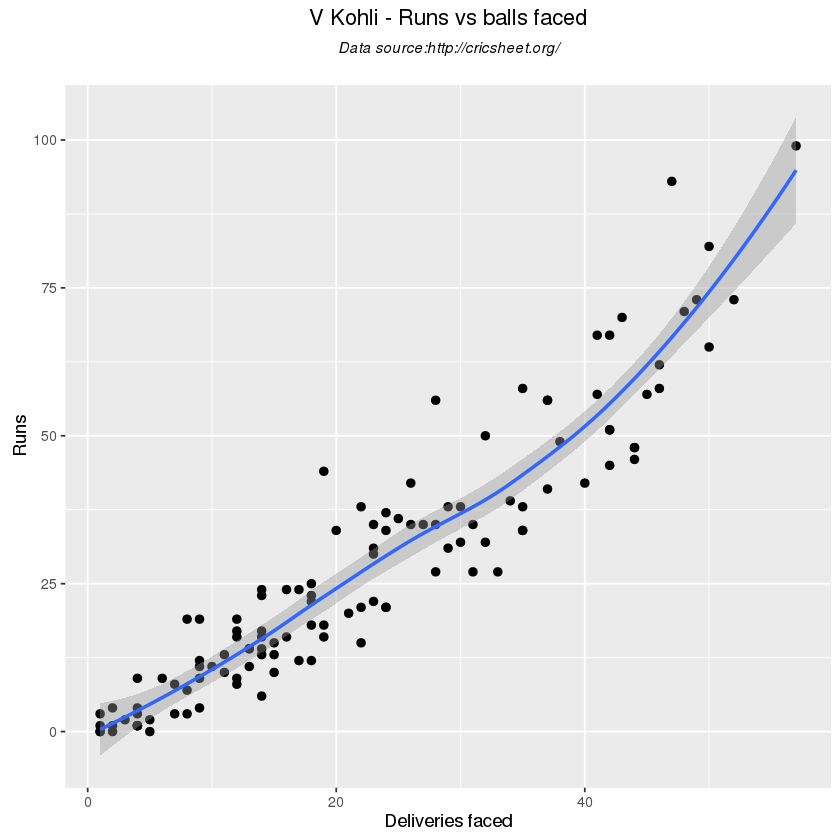

In [12]:
# Plot the runs scored vs deliveries faced by Virat Kohli at IPL
batsmanRunsVsDeliveries(kohli,"V Kohli")

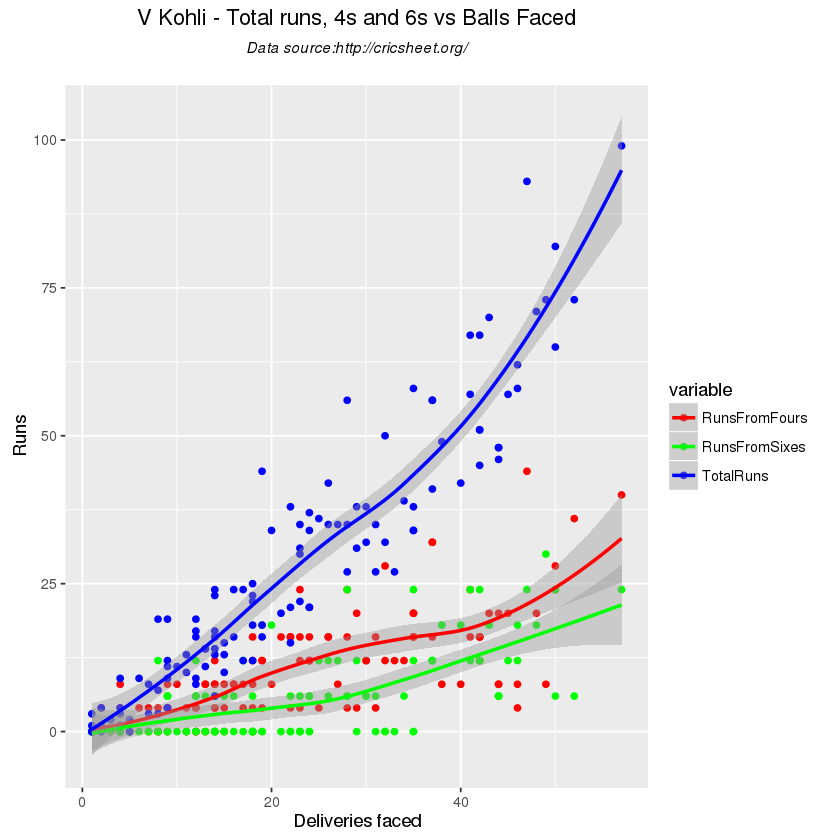

In [13]:
# Plot the runs scored by Virat Kohli as 4s, 6s in IPL matches
kohli46 <- select(kohli,batsman,ballsPlayed,fours,sixes,runs)
batsmanFoursSixes(kohli46,"V Kohli")

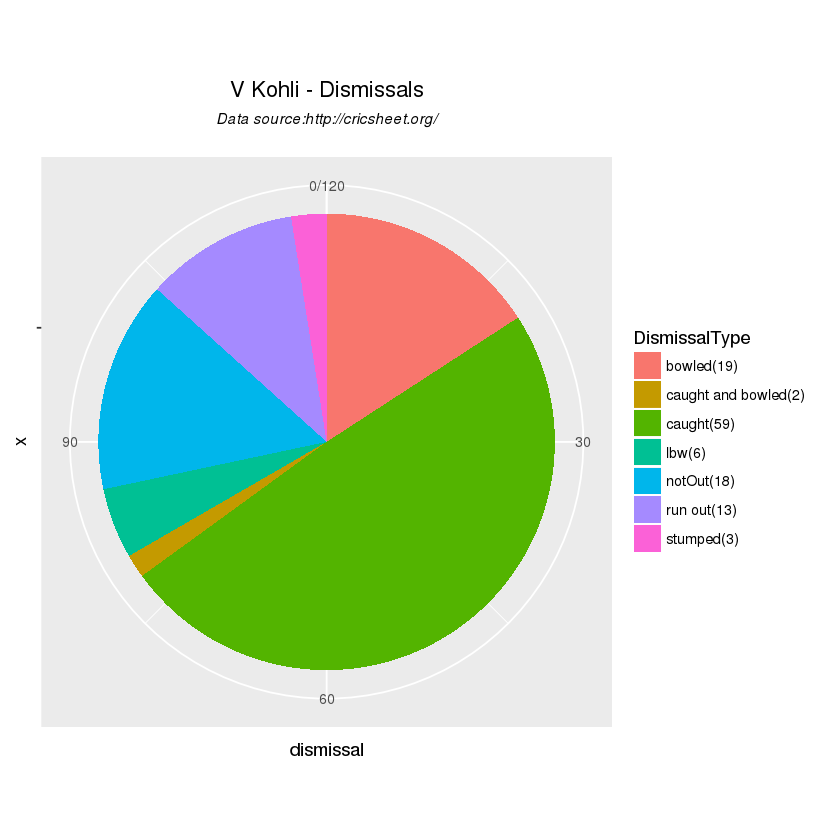

In [14]:
# Plot the different dismissal types of Virat Kohli in IPL matches
batsmanDismissals(kohli,"V Kohli")


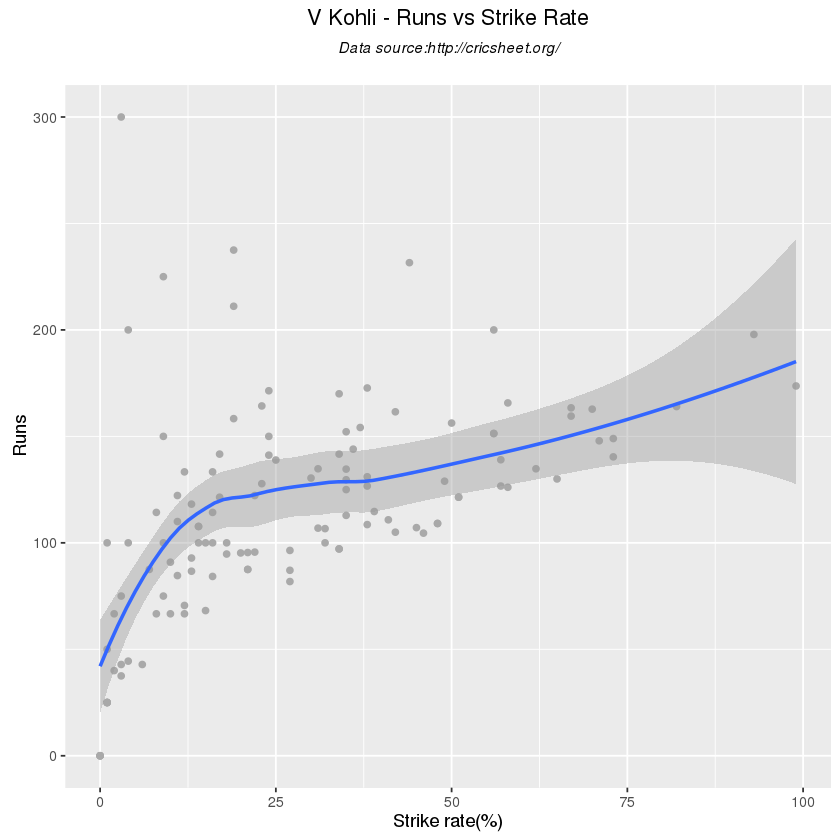

In [15]:
# Plot the strike rate of Virat Kohli at IPL
batsmanRunsVsStrikeRate(kohli,"V Kohli")

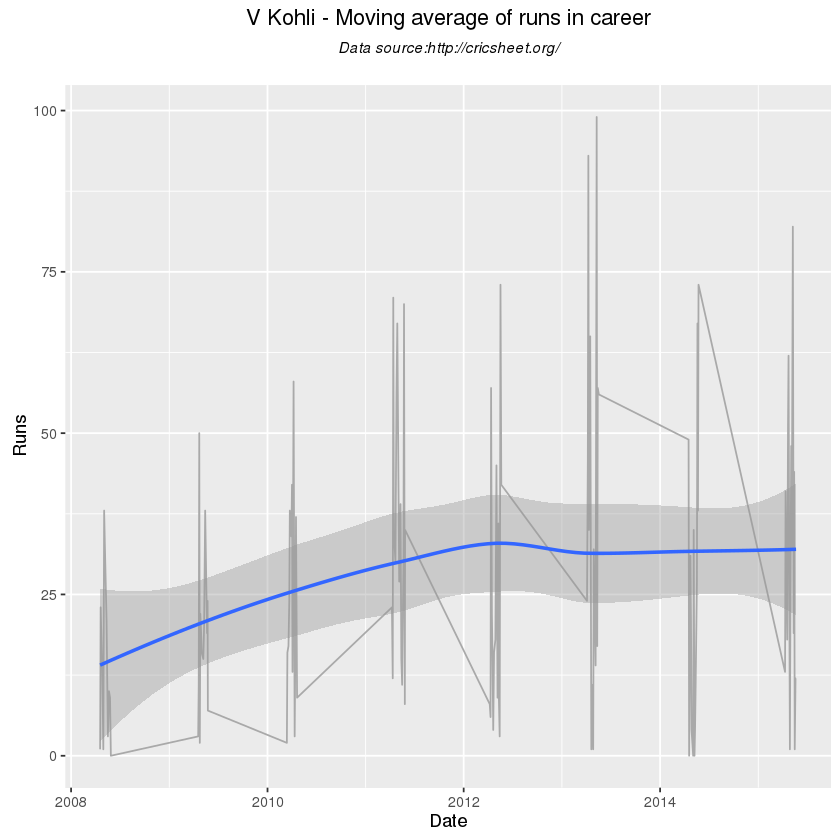

In [16]:
# Plot the the moving average of  Virat Kohli
batsmanMovingAverage(kohli,"V Kohli")

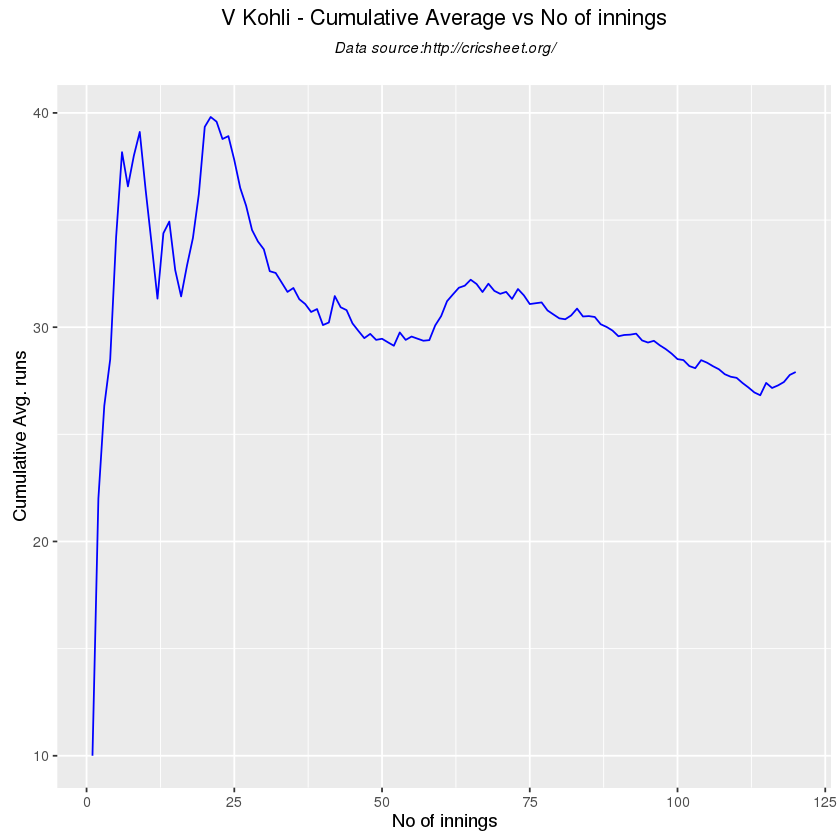

In [17]:
# Plot the running cumulative average of runs scored by Kohli in IPL
batsmanCumulativeAverageRuns(kohli,"V Kohli")

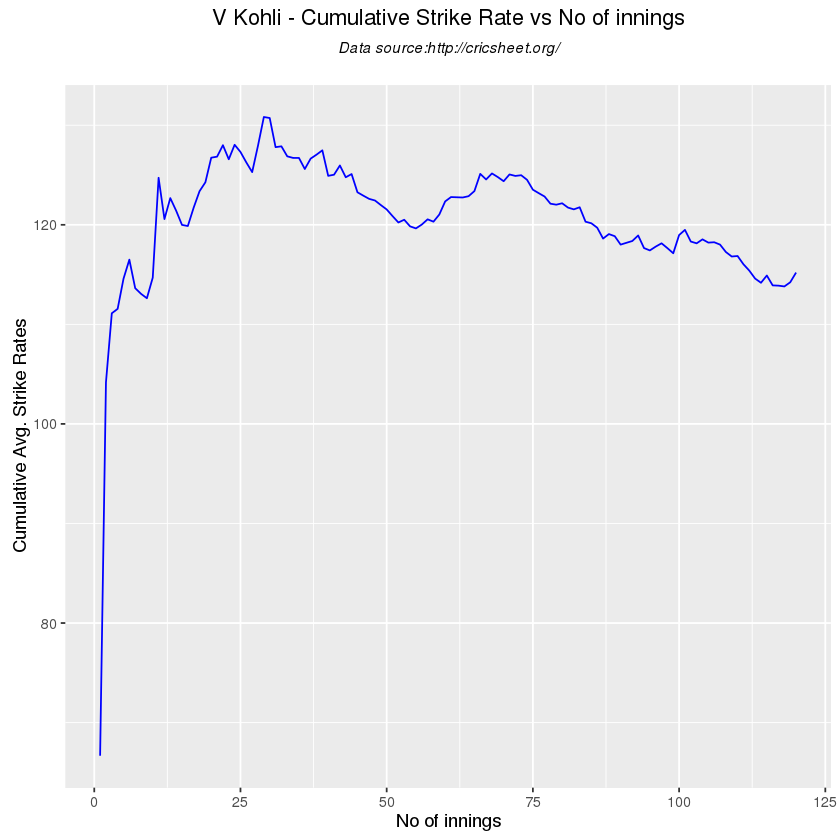

In [18]:
# Plot the running cumulative strike  rate of Kohli in IPL
batsmanCumulativeStrikeRate(kohli,"V Kohli")

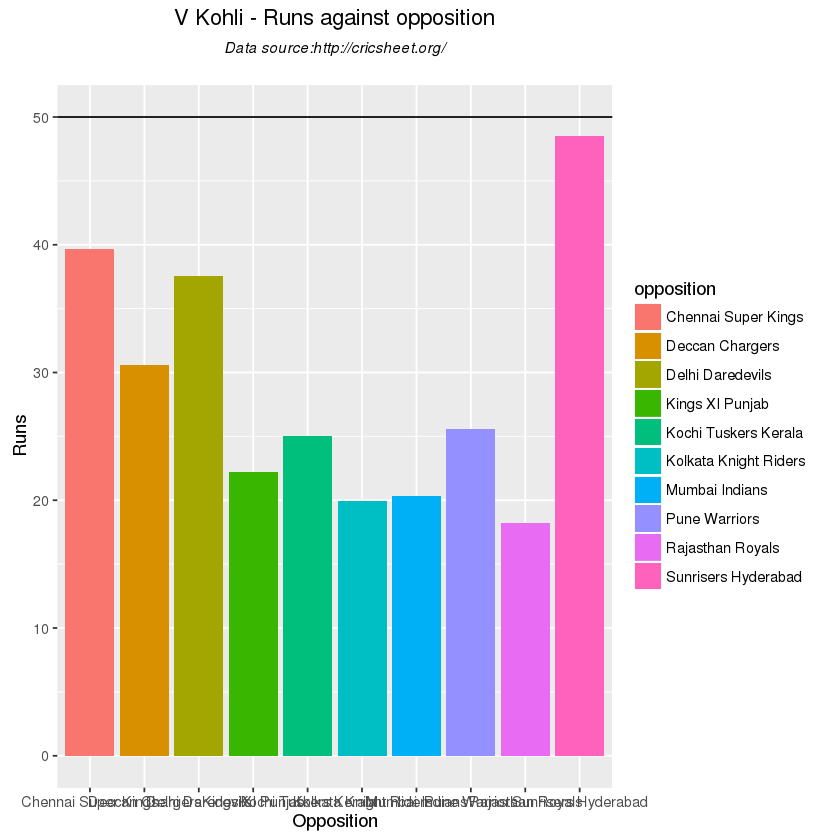

In [19]:
# Plot the running scored against different oppositions by Kohli in IPL
batsmanRunsAgainstOpposition(kohli,"V Kohli")

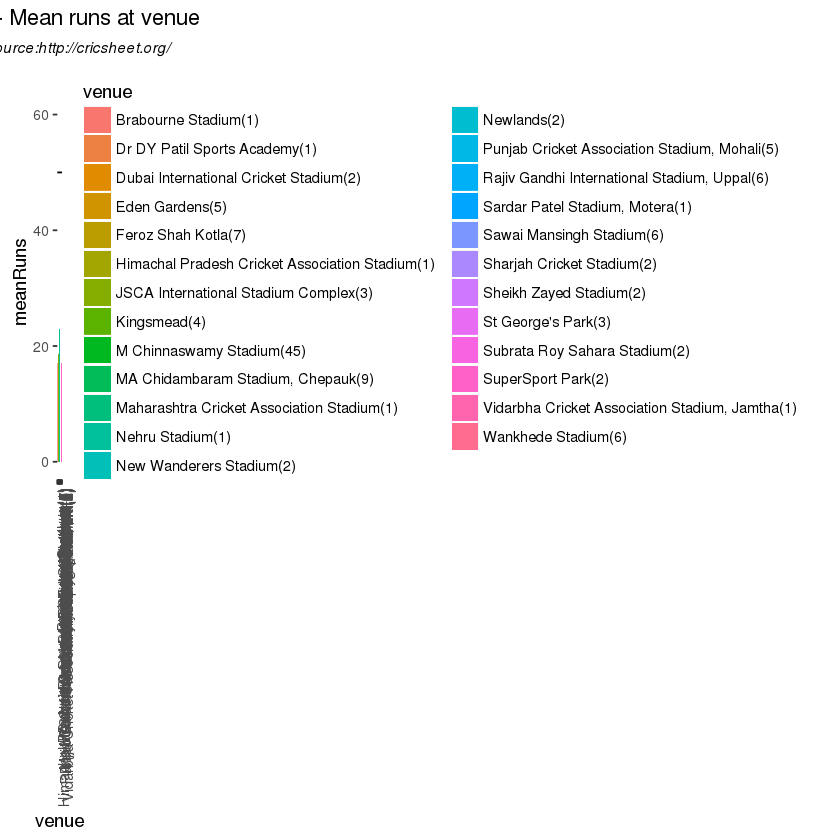

In [20]:
# Plot the runs scored at different venues by Kohli
batsmanRunsVenue(kohli,"V Kohli")

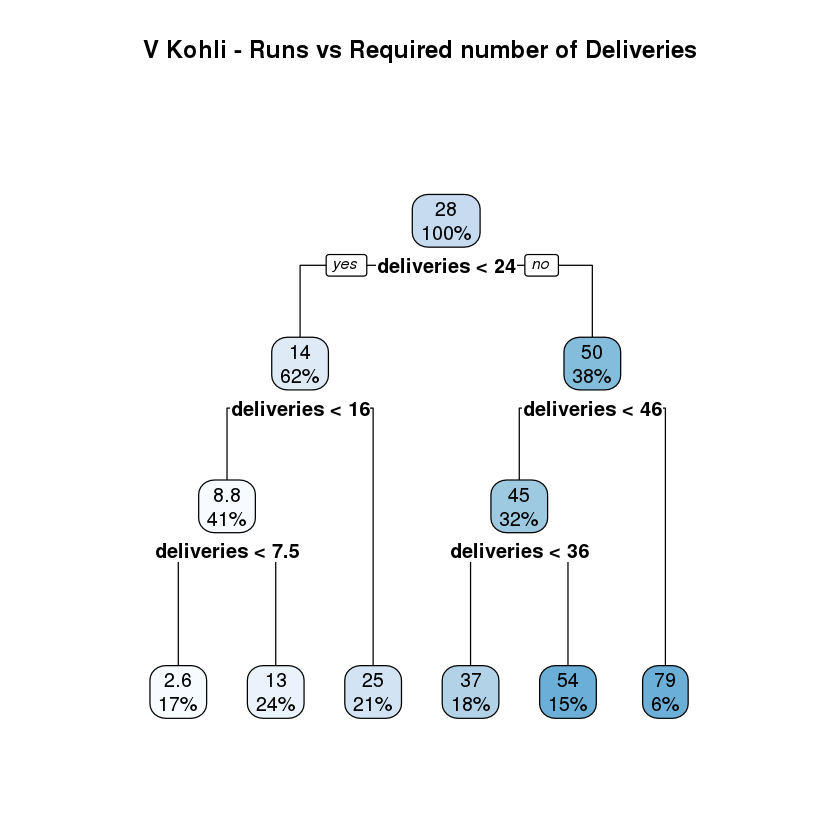

In [21]:
# Predict the runs scored  vs the deliveries faced
batsmanRunsPredict(kohli,"V Kohli")

**Disclaimer:** *This article represents the author’s viewpoint only and doesn’t necessarily represent IBM’s positions, strategies or opinions*